<a href="https://colab.research.google.com/github/daniyalaamir110/ML_course/blob/main/learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x_train = np.array([11.2, 18.9, 10.2, 2.4, 11.6, 8.1, 19.8, 3.0, 11.2, 13.1, 8.4, 9.7, 12.6, 10.9, 11.3, 16.1, 14.0, 15.9, 6.2, 1.1, 9.7, 16.7, 4.7, 13.9, 19.7, 3.0, 17.0, 6.7, 3.1, 9.8, 5.8, 6.8, 17.9, 19.7, 2.4, 19.9, 19.9, 18.4, 19.9, 6.0, 11.7, 6.4, 7.3, 14.0, 6.0, 14.4, 3.0, 8.2, 17.6, 2.7, 14.1, 9.8, 6.9, 2.3, 1.8, 9.9, 6.2, 13.9, 9.3, 10.1, 12.0, 19.7, 18.1, 1.7, 18.4, 4.4, 9.0, 17.3, 5.9, 11.3, 14.1, 1.1, 14.3, 6.3, 11.5, 1.3, 6.3, 15.5, 5.3, 17.1, 19.9, 2.3, 10.4, 5.7, 2.4, 19.9, 4.9, 9.1, 12.0, 6.2, 3.3, 16.3, 19.7, 13.3, 5.0, 16.6, 2.4, 5.4, 7.4, 9.8])
y_train = np.array([143.6424558942608, 226.75496919186713, 139.88664660217523, 59.09995594489472, 131.85668219790853, 88.5304521003008, 187.83693420905036, 71.9929395156964, 128.4453575745869, 142.792333826274, 127.59432689401402, 99.03584121088643, 162.69590838460857, 134.9312276865794, 112.24340246969035, 179.4839250994363, 179.45927067511576, 194.91190927791882, 111.90868505766947, 37.7636250398664, 184.44592507253344, 168.59218389865248, 59.02723219969597, 157.78271825050507, 188.62499082817195, 70.84983234678842, 208.07064981251685, 87.380006621243, 40.3116709265299, 88.09892258371329, 62.214833426041594, 102.87422567542454, 194.75677156576748, 208.46262411920554, 54.0289666304961, 242.16373305864056, 224.1423374011256, 210.29025791726343, 246.43724267099554, 83.51106587909665, 130.81422907110846, 97.4625100554795, 87.86739634614891, 152.64348551734477, 105.47467240279111, 158.1609465834876, -3.1035209512694024, 108.91035887777532, 188.08967096839413, 41.21726287060116, 170.05872653067019, 114.6787818329787, 93.2987766018951, 2.5537013360852967, 19.138863830654753, 147.07917477318585, 81.6289839097672, 125.52990756019554, 91.54936331128684, 101.1482764119362, 142.04695365099334, 208.34781438903974, 187.81635395127043, 37.07874608862806, 213.55508198867054, 58.81942710522219, 98.50581584773201, 184.57003559320233, 85.79641928373287, 132.85239700110853, 176.3459367741281, 8.00414845011283, 147.49327788086111, 98.46281711778498, 118.96344313300612, 60.68031437865356, 111.10410611756376, 202.84651506983806, 55.38718362940462, 192.53789897169142, 209.13135035593348, 61.463252166839055, 158.13209907356924, 94.47178831270759, 44.18288691480275, 211.68921406334914, 81.98173465258212, 86.54252926649386, 150.72672064764132, 63.70618137477445, 65.41096431923471, 179.78125246273873, 209.23471202046773, 135.28975252342303, 62.86509948463612, 197.1224359706793, 64.87721221837316, 84.52896322669392, 121.2777304883421, 168.78325432538665])

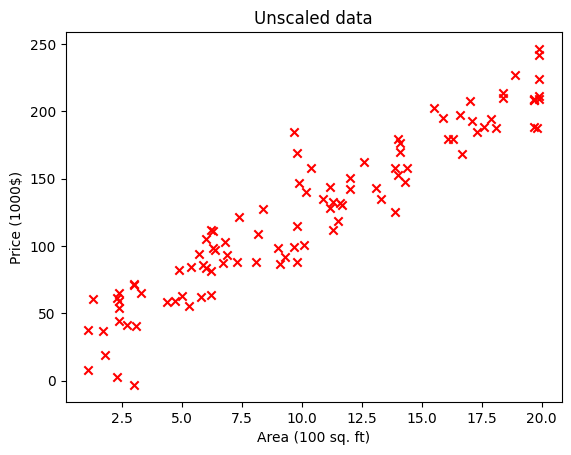

In [3]:
plt.xlabel("Area (100 sq. ft)")
plt.ylabel("Price (1000$)")
plt.title("Unscaled data")
plt.scatter(x_train, y_train, marker="x", c="r")
plt.show()

In [4]:
def zscore_norm(x):
  mu = np.mean(x)
  sigma = np.std(x)
  x_norm = (x - mu) / sigma
  return x_norm, mu, sigma

In [5]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  f_wb = x * w + b
  cost = np.sum((f_wb - y) ** 2) / (2 * m)
  return cost

In [6]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  f_wb = x * w + b
  dj_dw = np.sum((f_wb - y) * x) / m
  dj_db = np.sum(f_wb - y) / m
  return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_init, b_init, alpha, iters, compute_cost, compute_gradient):
  w = w_init
  b = b_init

  i_hist = np.arange(iters)
  J_hist = np.zeros(iters)

  step = math.ceil(iters / 10)

  for i in range(iters):
    dj_dw, dj_db = compute_gradient(x, y, w, b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    J_i = compute_cost(x, y, w, b)

    if ((i + 1) % step == 0):
      print(f"Iteration {i + 1}\t:\tcost = {J_i}\t, \tw = {w}, \tb = {b}")

    J_hist[i] = J_i

  return w, b, i_hist, J_hist

In [8]:
def draw_learning_curve(i, J):
  plt.plot(i, J)
  plt.title("Learning curve")
  plt.show()

In [9]:
w_init = 0
b_init = 0
iters = 5000
x_scaled, x_mu, x_sigma = zscore_norm(x_train)
y_scaled, y_mu, y_sigma = zscore_norm(y_train)

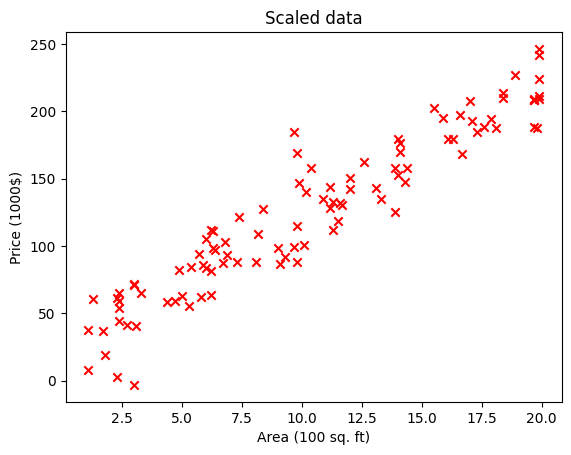

In [10]:
plt.xlabel("Area (100 sq. ft)")
plt.ylabel("Price (1000$)")
plt.title("Scaled data")
plt.scatter(x_train, y_train, marker="x", c="r")
plt.show()

In [11]:
alpha = 0.001

w_final, b_final, i_hist, J_hist = gradient_descent(x_scaled, y_scaled, w_init, b_init, alpha, iters, compute_cost, compute_gradient)

Iteration 500	:	cost = 0.21632768126628762	, 	w = 0.37285385368872004, 	b = -6.461498003318399e-19
Iteration 1000	:	cost = 0.11202266753373082	, 	w = 0.5989445800759131, 	b = 6.2116978227777485e-18
Iteration 1500	:	cost = 0.07367019120359716	, 	w = 0.7360412361854781, 	b = 1.6174839245763916e-17
Iteration 2000	:	cost = 0.05956816112837043	, 	w = 0.8191737618611924, 	b = 2.7355895326763883e-17
Iteration 2500	:	cost = 0.054382909189726984	, 	w = 0.8695835750640778, 	b = 3.7632119642694113e-17
Iteration 3000	:	cost = 0.0524763157756031	, 	w = 0.9001510244046914, 	b = 4.7313264417425336e-17
Iteration 3500	:	cost = 0.05177527010033122	, 	w = 0.9186864820829517, 	b = 5.555111926014398e-17
Iteration 4000	:	cost = 0.051517498812978325	, 	w = 0.9299259933524134, 	b = 5.552891479965148e-17
Iteration 4500	:	cost = 0.051422717489981305	, 	w = 0.9367413963367465, 	b = 5.551781256940526e-17
Iteration 5000	:	cost = 0.05138786683116157	, 	w = 0.9408741132071898, 	b = 5.5508930785208236e-17


In [12]:
def get_model(w, b):
  def model(x):
    return w * x + b
  return model

model = get_model(w_final, b_final)

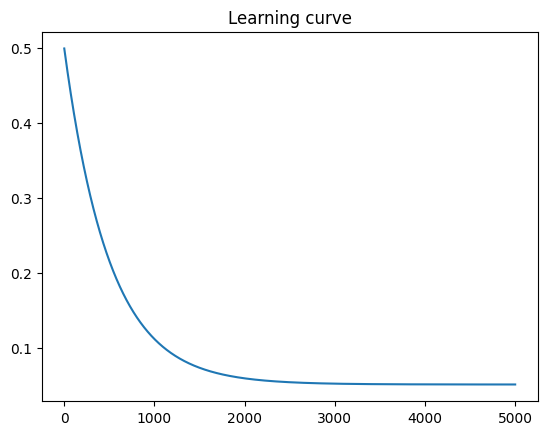

In [13]:
draw_learning_curve(i_hist, J_hist)

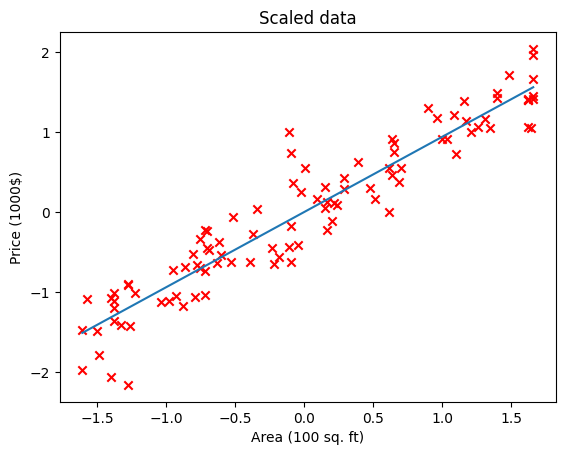

In [14]:
minxs = np.min(x_scaled)
maxxs = np.max(x_scaled)
xs = np.linspace(minxs, maxxs)
ys = model(xs)
plt.xlabel("Area (100 sq. ft)")
plt.ylabel("Price (1000$)")
plt.title("Scaled data")
plt.scatter(x_scaled, y_scaled, c="r", marker="x")
plt.plot(xs, ys)
plt.show()

In [15]:
def get_unscaled_model(model, x_mu, x_sigma, y_mu, y_sigma):
  def unscaled_model(x):
    x_scaled = (x - x_mu) / x_sigma
    y_scaled = model(x_scaled)
    y = y_scaled * y_sigma + y_mu
    return y
  return unscaled_model

unscaled_model = get_unscaled_model(model, x_mu, x_sigma, y_mu, y_sigma)

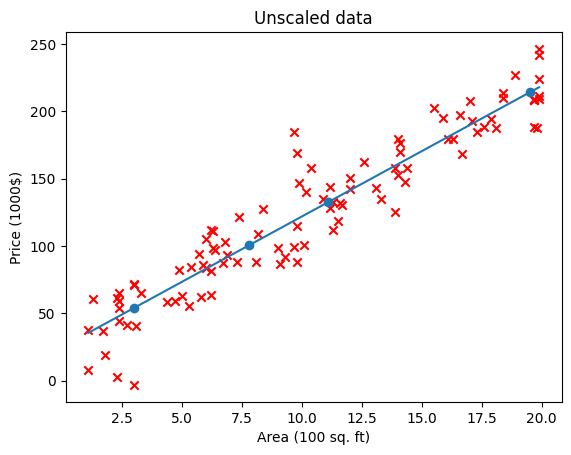

In [16]:
minxu = np.min(x_train)
maxxu = np.max(x_train)
xu = np.linspace(minxu, maxxu)
yu = unscaled_model(xu)
plt.xlabel("Area (100 sq. ft)")
plt.ylabel("Price (1000$)")
plt.title("Unscaled data")
plt.scatter(x_train, y_train, c="r", marker="x")
plt.plot(xu, yu)
x_pred = np.array([3, 7.8, 11.1, 19.5])
y_pred = unscaled_model(x_pred)
plt.scatter(x_pred, y_pred, marker="o")
plt.show()